In [77]:
using SciMLBase
using OrdinaryDiffEq
using ForwardDiff
import ForwardDiff: jacobian

using DiffEqCallbacks

using StaticArrays
using LinearAlgebra
using Statistics

using JLD2
using Dates

using PyPlot

using RecurrenceAnalysis

In [20]:
using BenchmarkTools

In [21]:
abstract type ODEType end
abstract type AbstractTask end

---
## Загрузка библиотек и модулей

---

In [22]:
include("Utils\\Anon_Utils.jl")
include("Utils\\CallBack_Utils.jl")
include("Utils\\Computation_Utils.jl")
include("Tasks\\ODE_Solving_Task.jl")
include("ODEs\\BS_ODE.jl")
include("Utils\\Visualization_Utils.jl")
include("Utils\\Period_Utils.jl")
include("Utils\\Session_Utils.jl")

---

## Исходная система (3 ДУ)

---

Создание ивента для определения периода траектории

In [76]:
ODE_Parameters = Dict("K" => 0.4,
                        "r" => 0.1,
                        "a2" => pi/2,
                        "a4" => pi)

Sngl = BS_ODE_Sngl(ODE_Parameters)


time_span = 500.0
ic = SA[2.941592653589793, 0.22, 0.43]

trans_time = 0.0
alg = DP8()
callback = "x -> sin(x[1] - 0.25)"
kwargs = Dict(:dtmax => 1e-1, :abstol => 1e-13, :reltol => 1e-13, :maxiters => 1e10);

In [362]:
trj = SolveODE(Sngl, ic, time_span; alg, trans_time, callback, kwargs)
sol = trj.solution; trj

[ODE::BS_ODE_Sngl]: [K::Float64]: 0.4
[r::Float64]: 0.1
[a2::Float64]: 1.5707963267948966
[a4::Irrational{:π}]: π
[P::SVector{3, Float64}]: [-0.4, -0.4, -1.2246467991473532e-16]

[solution::py_sol{BS_ODE_Sngl}]: [t]: 5007-element Vector{Float64}
[y]: 3-element Vector{Vector{Float64}} with size 5007
[t_events]: 1-element Vector{Vector{Float64}} with size 2
[y_events]: 1-element Vector{Matrix{Float64}} with size 2x3
[retcode]: Success

[alg::DP8]: DP8()
[kwargs::Dict{Symbol, Any}]: Dict{Symbol, Any}(:maxiters => 1.0e10, :reltol => 1.0e-13, :abstol => 1.0e-13, :dtmax => 0.1)
[callback::String]: x -> sin(x[1] - 0.25)


### Time Series

In [22]:
projFunc = "projCos"
varNames = ["\\phi_1", "\\phi_2", "\\phi_3"]
title = "Time Series"
plotKwargs = Dict(:linewidth => 3)

BS_TS = TimeSeries(Dict("projFunc" => projFunc, "varNames" => varNames, "title" => title, "kwargs" => plotKwargs));

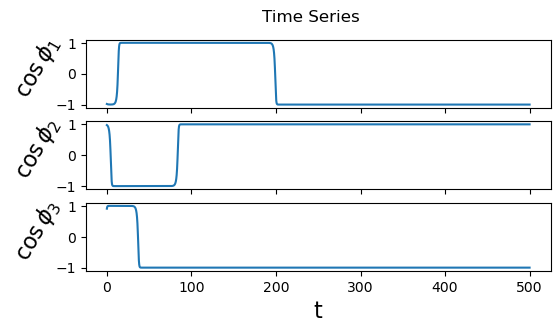

In [363]:
BS_TS(sol);

### Poincare

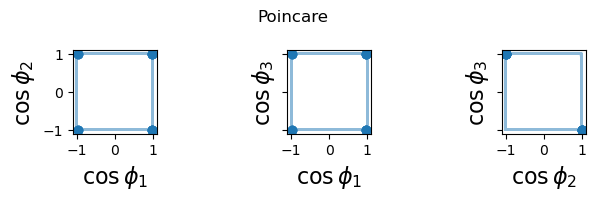

In [8]:
#savePath = "test.png"
projFunc = "projCos"
varNames = ["\\phi_1", "\\phi_2", "\\phi_3", "\\psi_1", "\\psi_2", "\\psi_3"]
title = "Poincare"
plotKwargs = Dict(:linewidth => 1)
showEvents = true
varPairs = [[[0, 1], [0, 2], [1, 2]]]

Pcr_properties = Dict("projFunc" => projFunc,
                     "varNames" => varNames,
                     "title" => title,
                     "showEvents" => showEvents,
                     "varPairs" => varPairs,
                     "kwargs" => plotKwargs)
plotPoincare(sol, plot_properties = Pcr_properties);

### Return time

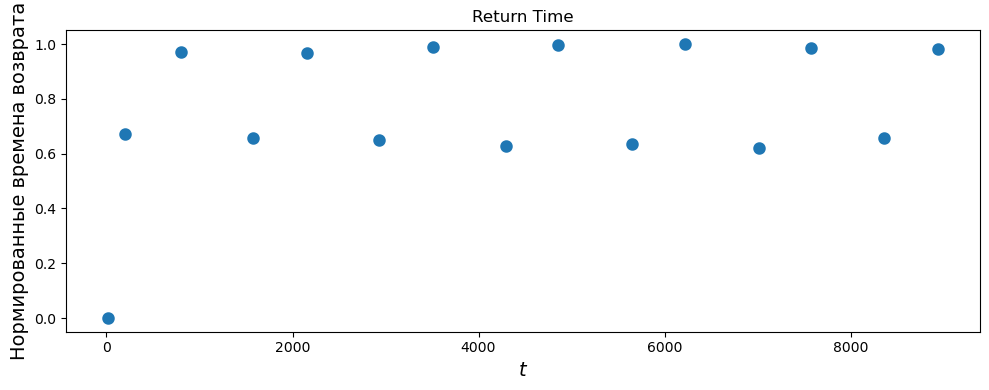

In [9]:
#savePath = "test.png"
normFunc = "normDefault"
title = "Return Time"
plotKwargs = Dict(:linewidth => 3)

RT_properties = Dict("normFunc" => normFunc, "title" => title, "kwargs" => plotKwargs)
plotReturnTime(sol, plot_properties = RT_properties);

---

## Объединенная система (6 ДУ)

---

In [5]:
ODE_Parameters = Dict("K" => 1.5789473684210527,
                         "r" => 0.39473684210526316,
                         "a2" => pi/2,
                         "a4" => 3.24685581148453,
                         "Eps" => 1e-3)

#ODE_Parameters = Dict("K" => 0.4,
#                         "r" => 0.1,
#                         "a2" => pi/2,
#                         "a4" => pi,
#                         "Eps" => 1e-1)

Couple_function = Exp_Couple

Duo = BS_ODE_Duo(ODE_Parameters, Exp_Couple);
Sngl = BS_ODE_Sngl(ODE_Parameters)

[K::Float64]: 1.5789473684210527
[r::Float64]: 0.39473684210526316
[a2::Float64]: 1.5707963267948966
[a4::Float64]: 3.24685581148453
[P::SVector{3, Float64}]: [-1.5702078118098561, -1.5789473684210527, -1.2246467991473532e-16]


In [14]:
time_span = 1000.0
trans_time = 100.0

val = 0.1
ic = [0.0, pi, pi, 0.0, pi, pi]

ic = ic .+ [r/10 for r in randn(6)]
#ic = SA[pi - 2.3*val, pi - 1.2*val, 0.7*val, pi - 2.1*val, 0.4*val, pi - val]

#ic = SA[pi - 2.3*val, pi - 1.2*val, 0.7*val, pi - 2.1*val, 0.4*val, pi - val]

alg = DP8()
callback = "x -> cos(x[1])"
kwargs = Dict(:dtmax => 1e-1, :dtmin => 1e-10, :abstol => 1e-13, :reltol => 1e-13, :maxiters => 1e10);

### Ode solving

In [73]:
trj = SolveODE(Duo, ic, time_span; alg, callback, trans_time, kwargs)
sol = trj.solution; trj

[ODE::BS_ODE_Duo]: [Forward_ODE::BS_ODE_Sngl]:
[K::Float64]: 1.5789473684210527
[r::Float64]: 0.39473684210526316
[a2::Float64]: 1.5707963267948966
[a4::Float64]: 3.24685581148453
[P::SVector{3, Float64}]: [-1.5702078118098561, -1.5789473684210527, -1.2246467991473532e-16]

[Backward_ODE::BS_ODE_Sngl]:
[K::Float64]: -1.5789473684210527
[r::Float64]: 0.39473684210526316
[a2::Float64]: 1.5707963267948966
[a4::Float64]: 3.24685581148453
[P::SVector{3, Float64}]: [1.5702078118098561, -1.5789473684210527, -1.2246467991473532e-16]

[Eps::Float64]: 0.001
[Couple::typeof(Exp_Couple)]: [Exp_Couple]: 1.0 / (1.0 + exp(10.0 * cos(x)))

[solution::py_sol{BS_ODE_Duo}]: [t]: 12781-element Vector{Float64}
[y]: 6-element Vector{Vector{Float64}} with size 12781
[t_events]: 1-element Vector{Vector{Float64}} with size 51
[y_events]: 1-element Vector{Matrix{Float64}} with size 51x6
[retcode]: Success

[alg::DP8{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}]

In [78]:
s = RefinePeriod(trj, getPeriodTime(sol))
period = s.minimizer[1]; println("Trajectory period: $period with tolerance $(s.minimum)")
syncs = GetSyncs(sol); println(syncs)

LoadError: UndefVarError: optimize not defined

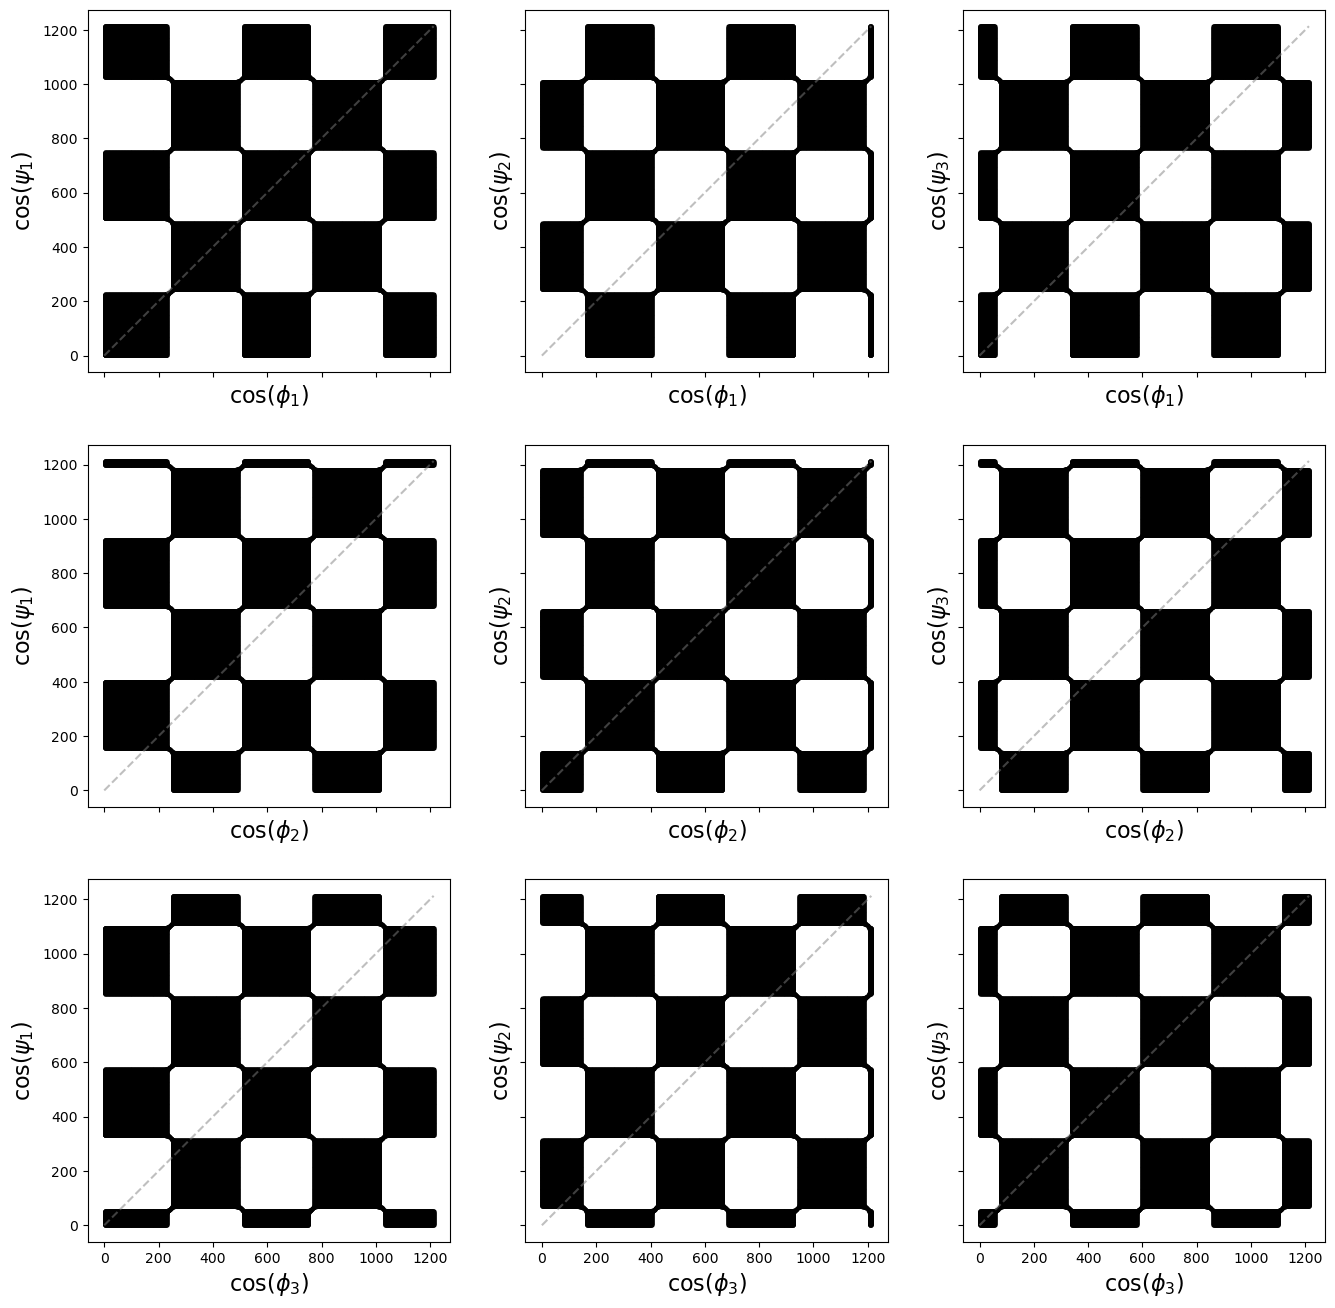

In [37]:
varPairs = [[[1, 4], [1, 5], [1, 6]],
            [[2, 4], [2, 5], [2, 6]],
            [[3, 4], [3, 5], [3, 6]]]

fig, axes = plt.subplots(3, 3, sharex = true, sharey = true, figsize = (16, 16))

for (i, pair_row) in enumerate(varPairs)
    for (j, pair) in enumerate(pair_row)
        firstVarInd = varPairs[i][j][1]
        secondVarInd = varPairs[i][j][2]

        R = CrossRecurrenceMatrix([cos(y) for y in sol.y[firstVarInd]], [cos(y) for y in sol.y[secondVarInd]], 0.1)
        xs, ys = coordinates(R)
        axes[i, j].set_xlabel("\$\\cos(\\phi_{$firstVarInd})\$", fontsize=16)
        axes[i, j].set_ylabel("\$\\cos(\\psi_{$(secondVarInd - 3)})\$", fontsize=16)
        axes[i, j].scatter(xs, ys, s = 1, color = "black", marker = "s")
        axes[i, j].plot([0, size(R)[1]], [0, size(R)[2]], color = "gray", alpha = 0.5, zorder = 101, ls = "--")
        axes[i, j].set_aspect("equal")
    end
end

### Graphics definition

In [91]:
BS_FP = BS_FullPlot()

TS = BS_FP.TS; AD = BS_FP.AD; RT = BS_FP.RT; Pcr = BS_FP.Pcr;

### multi-fig

┌ Warning: Cannot plot return time (perhaps, not enough event points)
└ @ Main c:\Users\artyo\YandexDisk\Other\Julia\Coupled_contours\Utils\Visualization_Utils.jl:104


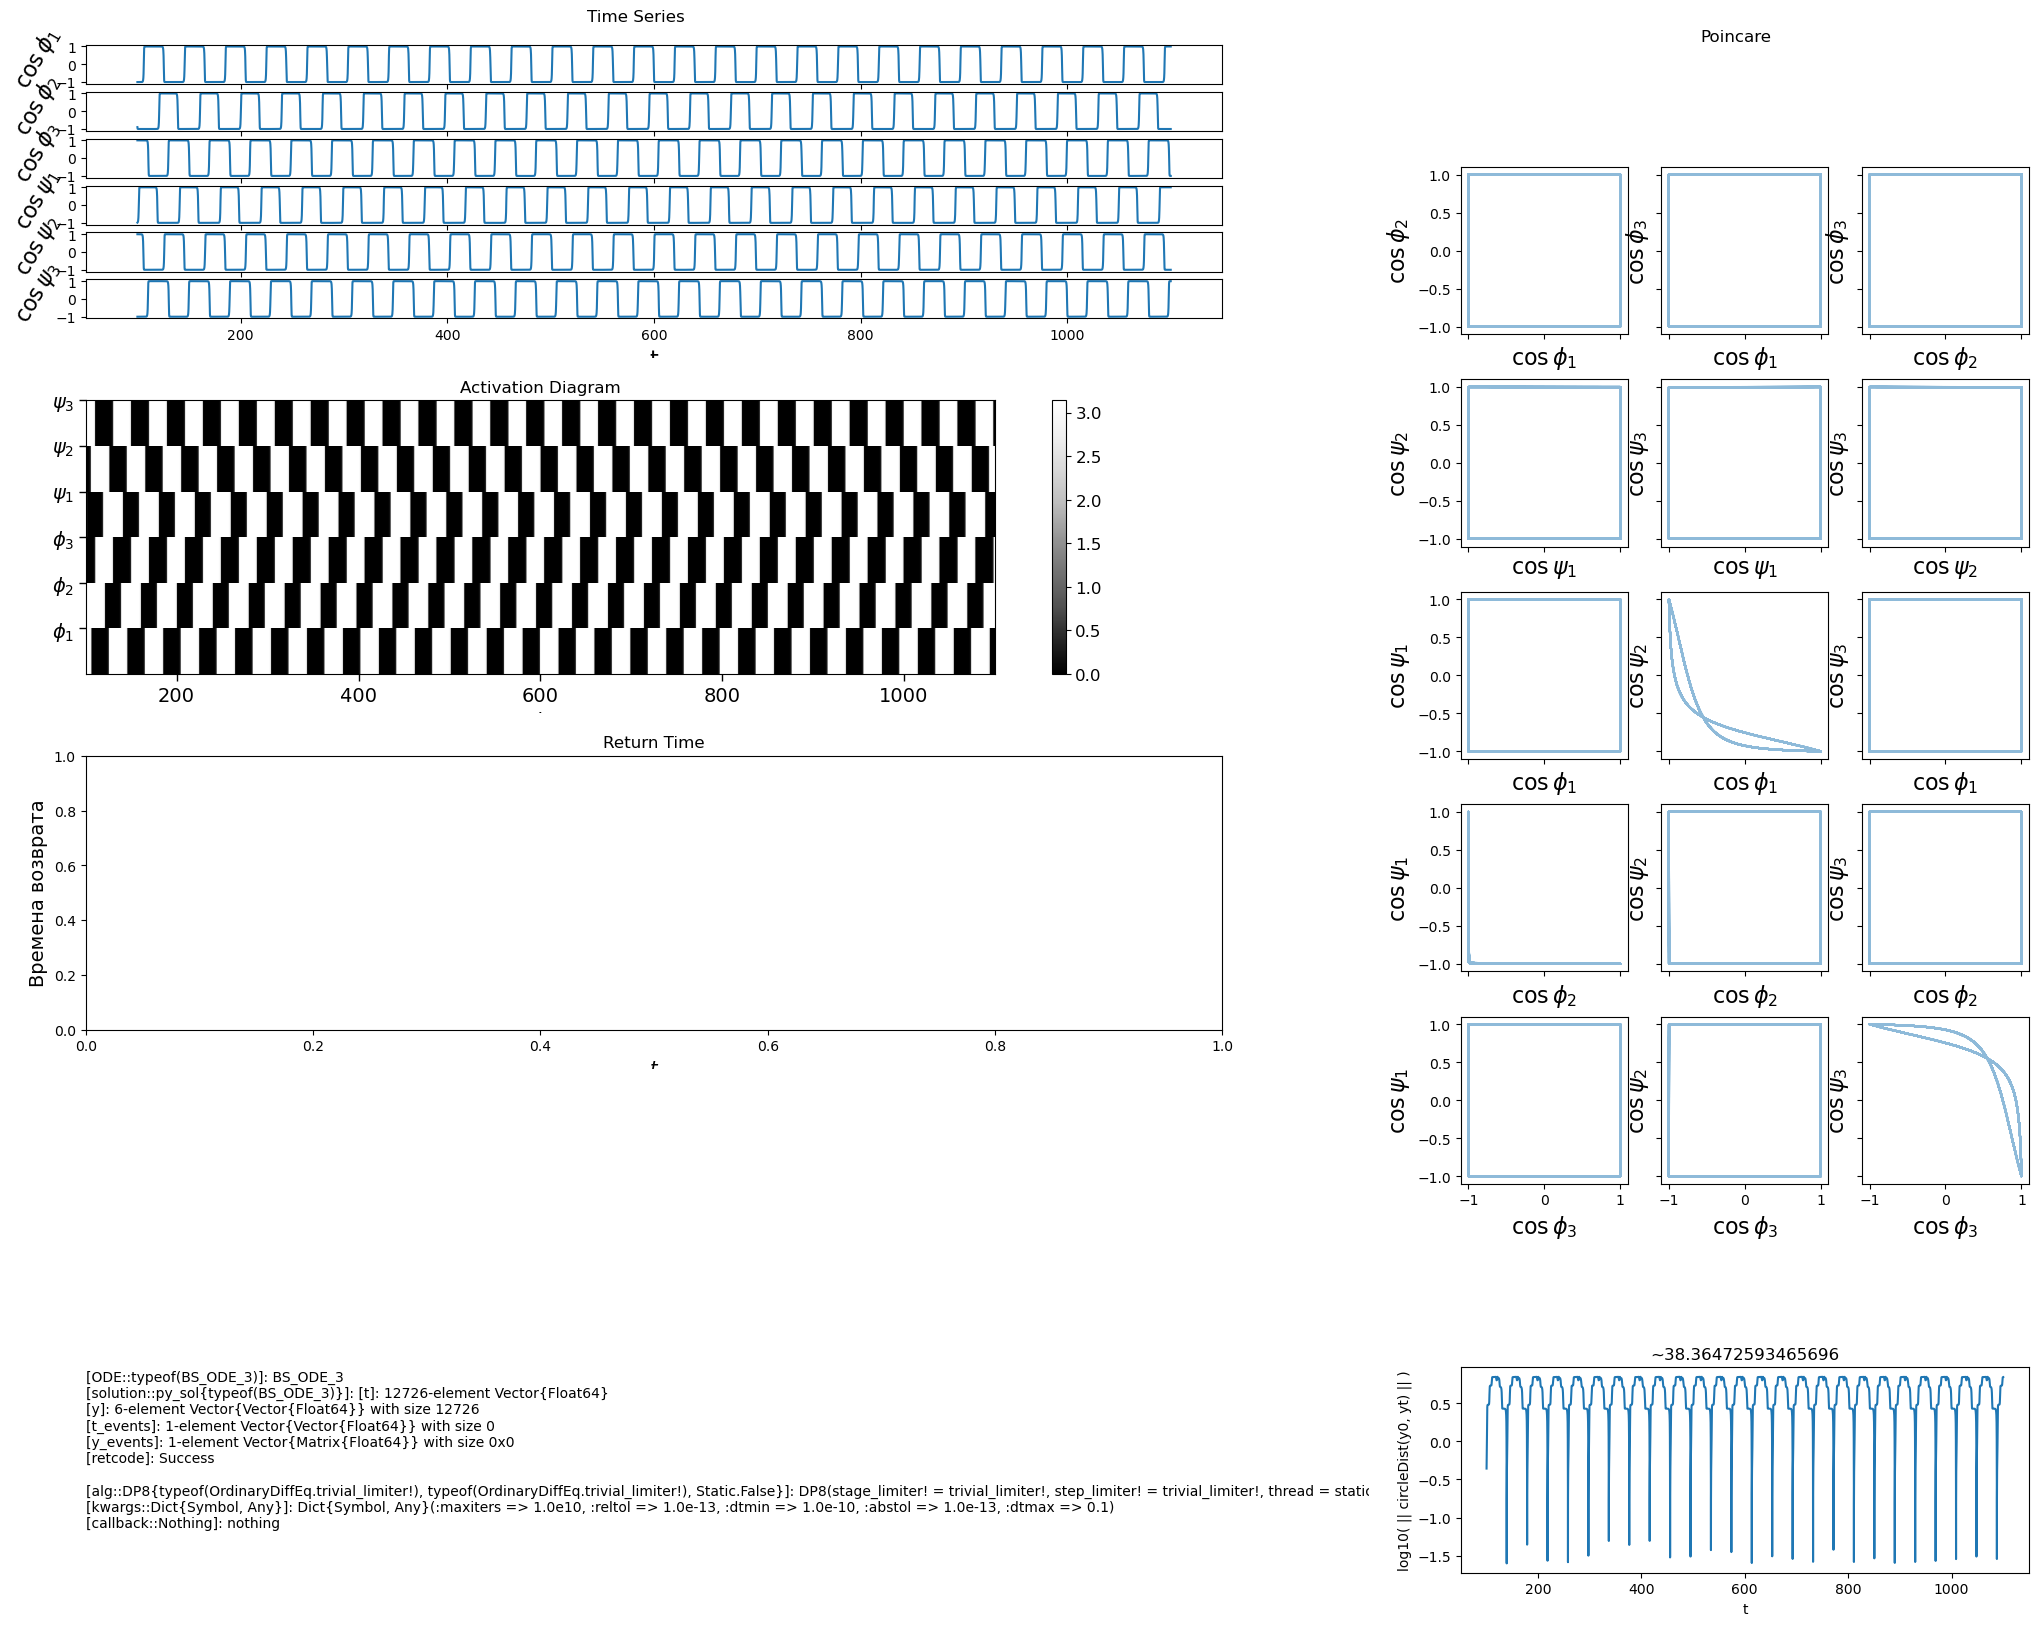

In [92]:
BS_FP(trj)

---

## Редуцированная система (3 ДУ)

---

In [31]:
Red = BS_ODE_Red(ODE_Parameters, Couple_function, syncs)

red_ic = [y[1] for y in sol.y[1:3]]

3-element Vector{Float64}:
 47.123889803875635
 43.98359118147637
 50.265482669320114

In [32]:
red_trj = SolveODE(Red, red_ic, time_span; alg, kwargs)
red_sol = red_trj.solution; red_trj

[ODE::BS_ODE_Red]: [BS_ODE::BS_ODE_Sngl]:
[K::Float64]: 1.5789473684210527
[r::Float64]: 0.39473684210526316
[a2::Float64]: 1.5707963267948966
[a4::Float64]: 3.24685581148453
[P::SVector{3, Float64}]: [-1.5702078118098561, -1.5789473684210527, -1.2246467991473532e-16]

[Syncs::BS_Syncs]:
Synchronization: ["phi_1 => psi_2", "phi_2 => psi_1", "phi_3 => psi_3"] with delay: π

[Eps::Float64]: 1.0e-6
[Couple::AnonFunc]: #140: x -> 1/(1 + exp(10*cos(x)))


[solution::py_sol{BS_ODE_Red}]: [t]: 5594-element Vector{Float64}
[y]: 3-element Vector{Vector{Float64}} with size 5594
[t_events]: 1-element Vector{Vector{Float64}} with size 0
[y_events]: 1-element Vector{Matrix{Float64}} with size 0x0
[retcode]: Success

[alg::DP8]: DP8()
[kwargs::Dict{Symbol, Any}]: Dict{Symbol, Any}(:maxiters => 1.0e10, :reltol => 1.0e-13, :dtmin => 1.0e-20, :abstol => 1.0e-13, :dtmax => 0.1)
[callback::Nothing]: nothing


In [33]:
s = RefinePeriod(red_trj, getPeriodTime(red_sol))
red_period = s.minimizer[1]; println("Trajectory period: $period with tolerance $(s.minimum)")

Trajectory period: 66.79285406338134 with tolerance 5.704134078488368e-8


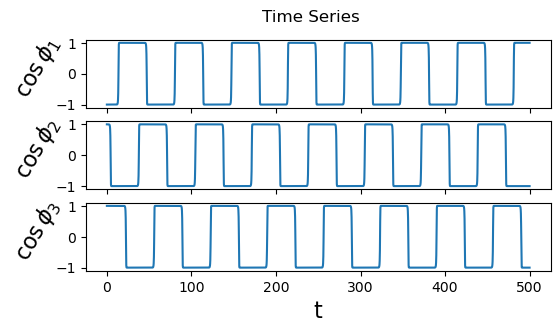

In [34]:
fig = TS(red_sol);

In [39]:
#plotNorms(red_sol; skip_points = 10, norm_arg = 2)

---

## Редуцированная система + система в вариациях (3 + 6х6 ДУ)

---

In [35]:
custom_Jacobian = z -> jacobian(x -> Duo(x, [], 0.0), [z; Red.Syncs(z)])
#Duo_Jac = Get_Duo_Jac(Duo) # Здесь зашита связь 1 - cos(x) так что использовать можно только при такой же связи в системе!!!
#custom_Jacobian = z -> Duo_Jac([z; Red.Syncs(z)])
Tan_Red = TangentODE(Red, custom_Jacobian, 3, 6)

#Tan_Red = TangentODE(Duo, 6)

u0 = [y[1] for y in sol.y[1:3]]
Q0 = vec(diagm(ones(6)))

#=
Q0 = vec([1.0 0.0 0.0 0.0 0.0 0.0;
    0.0 1.0 0.0 0.0 0.0 0.0;
    0.0 0.0 1.0 0.0 0.0 0.0;
    1.0 0.0 0.0 1.0 0.0 0.0;
    0.0 0.0 1.0 0.0 1.0 0.0;
    0.0 1.0 0.0 0.0 0.0 1.0;])
=#

tanred_ic = cat(u0, Q0, dims = 1);

In [36]:
tan_trj = SolveODE(Tan_Red, tanred_ic, red_period; alg, kwargs)
ode_sol, tan_sol = splitSol(tan_trj.solution); tan_trj

[ODE::TangentODE]: [ODE::BS_ODE_Red]: [BS_ODE::BS_ODE_Sngl]:
[K::Float64]: 1.5789473684210527
[r::Float64]: 0.39473684210526316
[a2::Float64]: 1.5707963267948966
[a4::Float64]: 3.24685581148453
[P::SVector{3, Float64}]: [-1.5702078118098561, -1.5789473684210527, -1.2246467991473532e-16]

[Syncs::BS_Syncs]:
Synchronization: ["phi_1 => psi_2", "phi_2 => psi_1", "phi_3 => psi_3"] with delay: π

[Eps::Float64]: 1.0e-6
[Couple::AnonFunc]: #140: x -> 1/(1 + exp(10*cos(x)))


[Jacobian::var"#144#146"]: #144
[ODEDim::Int64]: 3
[JacDim::Int64]: 6

[solution::py_sol{TangentODE}]: [t]: 1206-element Vector{Float64}
[y]: 39-element Vector{Vector{Float64}} with size 1206
[t_events]: 1-element Vector{Vector{Float64}} with size 0
[y_events]: 1-element Vector{Matrix{Float64}} with size 0x0
[retcode]: Success

[alg::DP8]: DP8()
[kwargs::Dict{Symbol, Any}]: Dict{Symbol, Any}(:maxiters => 1.0e10, :reltol => 1.0e-13, :dtmin => 1.0e-20, :abstol => 1.0e-13, :dtmax => 0.1)
[callback::Nothing]: nothing


In [21]:
BS_FPT = BS_FullPlot_Tan(EG = Eigens(projFunc = x -> log10(abs(x))))

EG = BS_FPT.EG;

In [22]:
#BS_FPT(tan_trj)

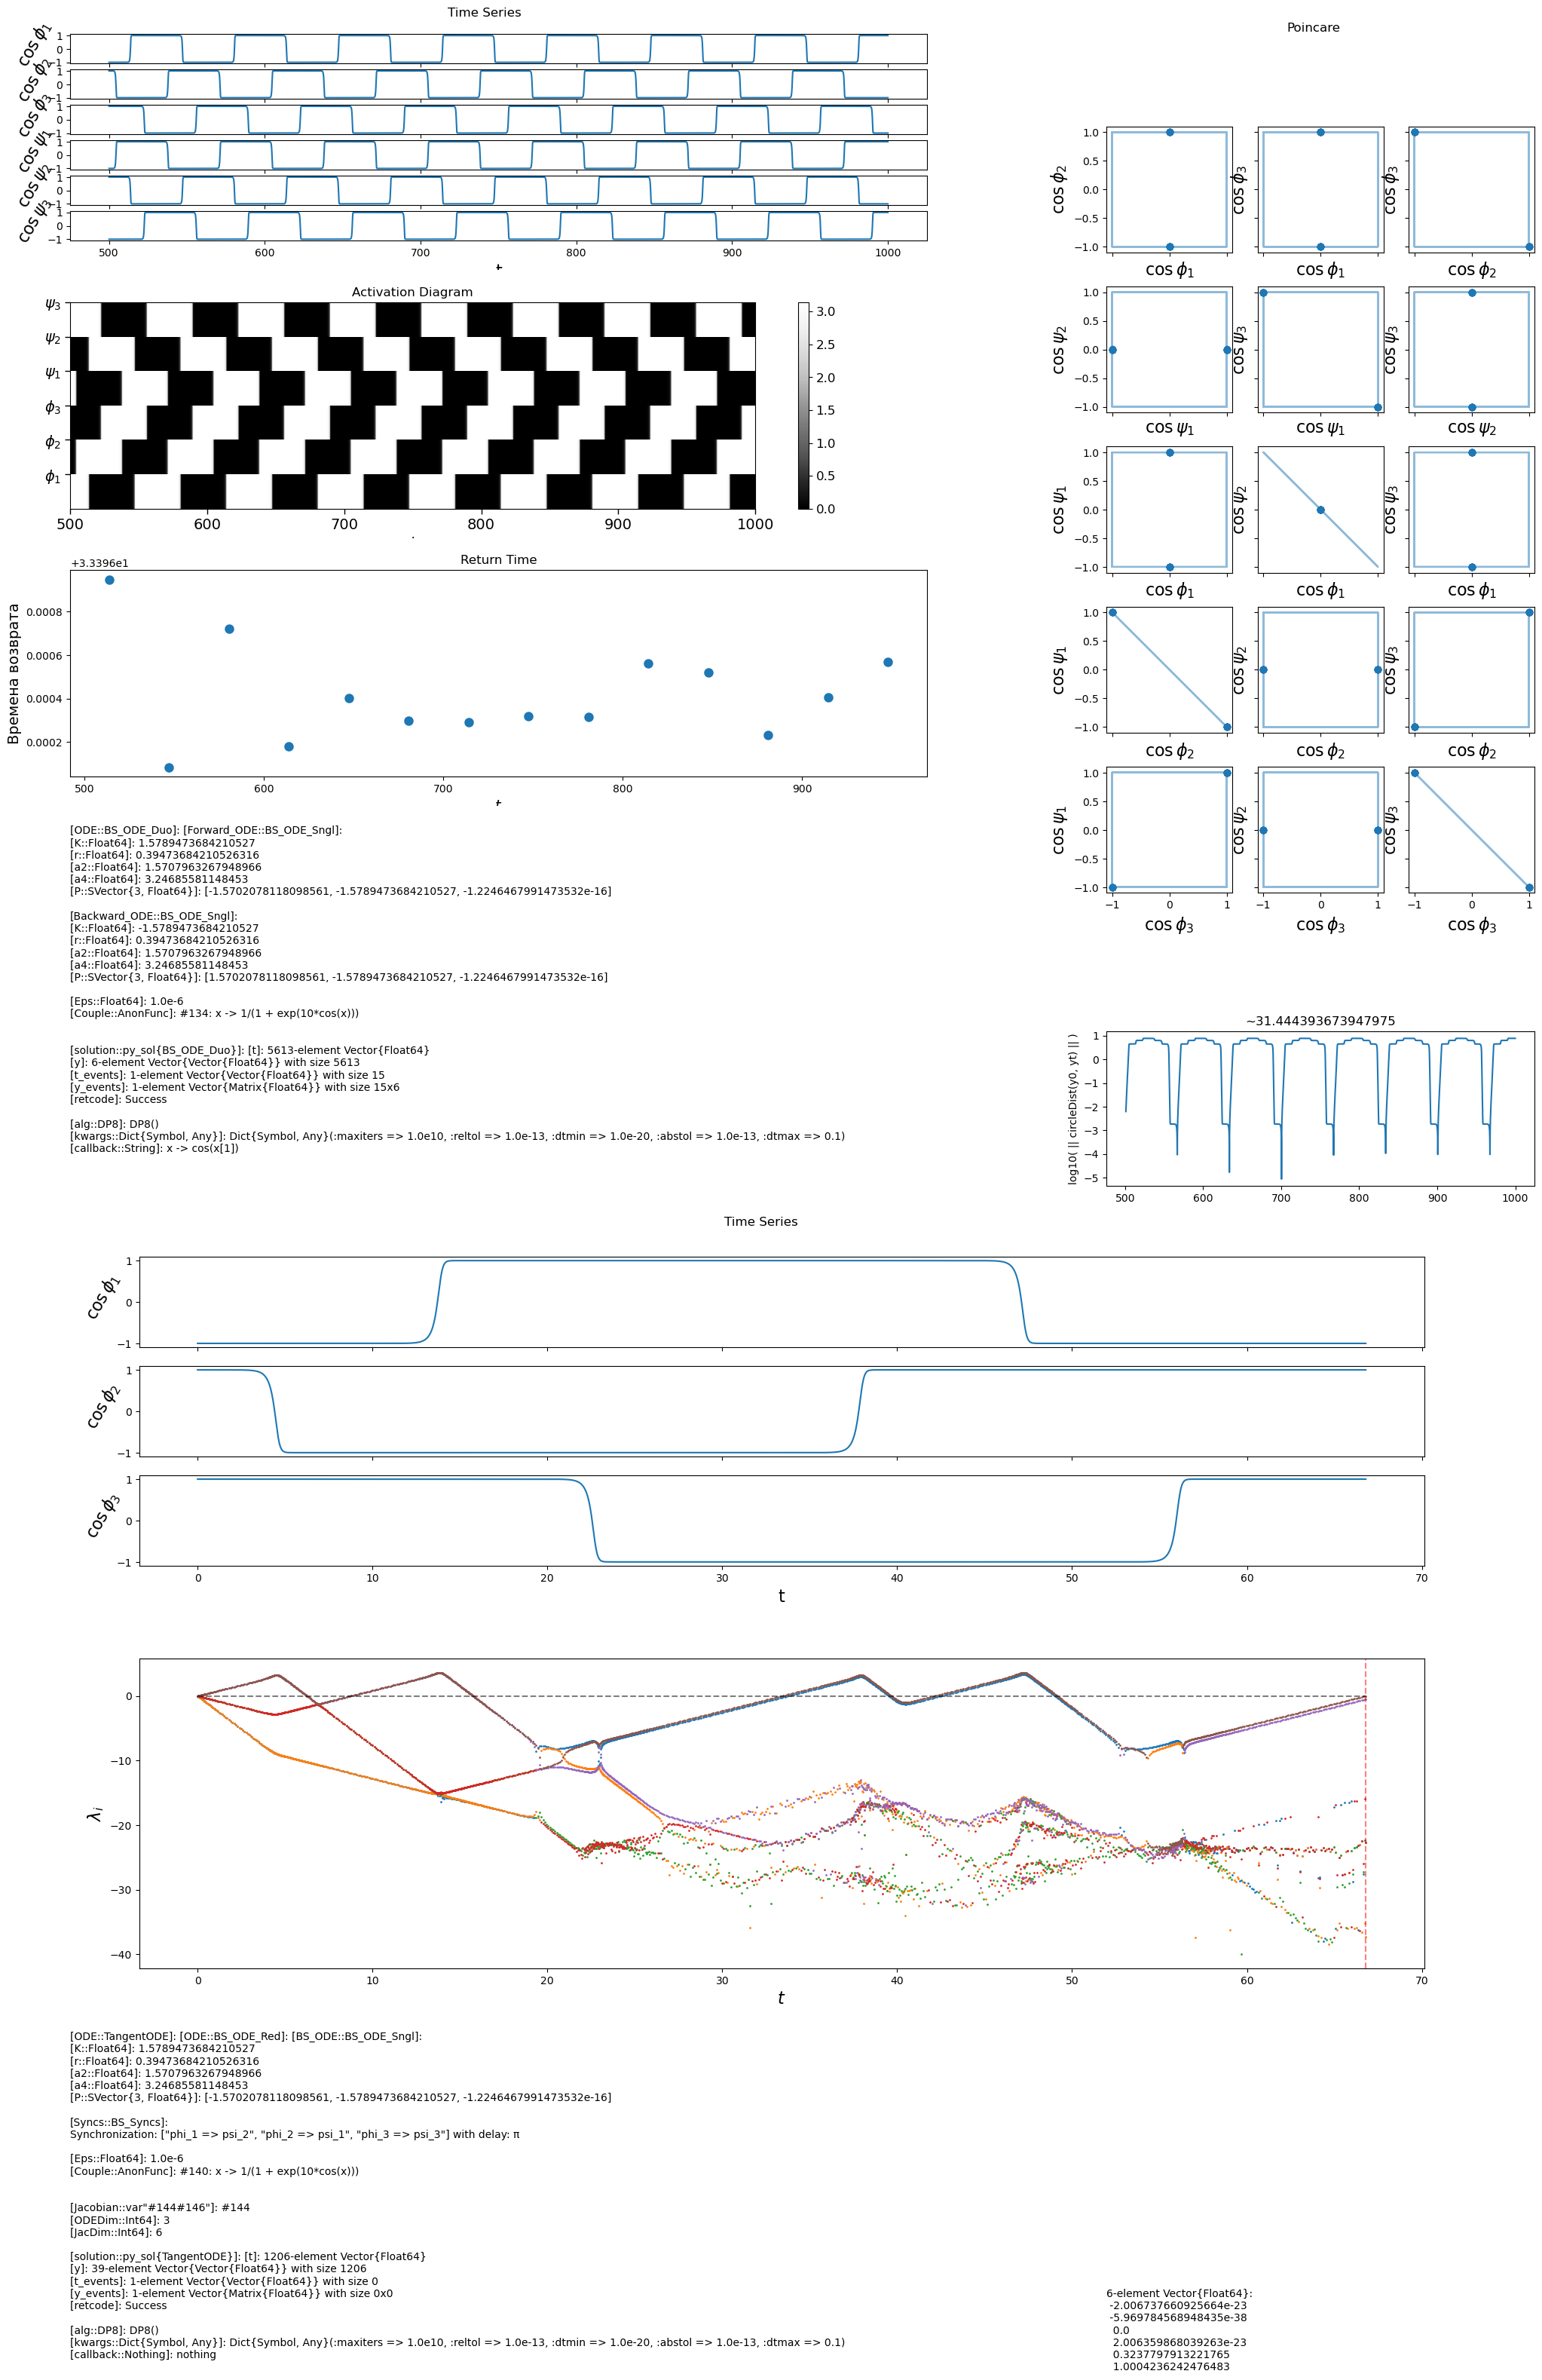

PyObject Text(0, 0, '6-element Vector{Float64}:\n -2.006737660925664e-23\n -5.969784568948435e-38\n  0.0\n  2.006359868039263e-23\n  0.3237797913221765\n  1.0004236242476483')

In [37]:
fig = plt.figure(figsize=(22, 32))
subfigs1 = fig.subfigures(2, 1)

BS_FP(trj; fig = subfigs1[1])
BS_FPT(tan_trj; fig = subfigs1[2])


In [247]:
eigs = getTanEigens(tan_sol)

6-element Vector{Vector{Number}}:
 [1.0, 0.9555028820385634, 0.828144789403772, 0.7432576005533394, 0.6788227767321001, 0.6271695092817665, 0.5809207966870271, 0.5428418022723026, 0.5116093491971087, 0.47782569641887473  …  -1.1917950565497185e-17 + 0.0im, -1.8813750051917028e-16 + 0.0im, -2.035734827699236e-16 + 0.0im, -6.193747868793723e-17, -2.0265543346989004e-17, 1.6915451505092436e-21, -4.585868552100814e-16 + 0.0im, -8.63078367750199e-17 + 0.0im, -4.918540862267416e-16 + 0.0im, -7.274259926395904e-17]
 [1.0, 0.9555028820385635, 0.828144789403772, 0.7432576005533396, 0.6788227767321002, 0.6271695092817667, 0.5809207966870273, 0.5428418022723034, 0.5116093491971088, 0.47782569641887557  …  8.420319287880329e-22 + 0.0im, 2.9697196308445602e-21 + 0.0im, 9.876812111985033e-22 + 0.0im, -4.07718102812026e-18, -9.591452876540784e-21, 4.23940092447164e-17, 1.2159850927720342e-21 + 0.0im, 2.125083799850226e-21 + 0.0im, -1.8368674177722998e-22 + 0.0im, -1.7219612167487225e-21]
 [1.0, 0.992